# DAT_SF_13 Midterm Homework 4

###About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute. The following link is for reference only; the spam dataset is included in our github repo, in the HW4 directory. _Be sure to use the dataset provided in our course github repo._

http://archive.ics.uci.edu/ml/datasets/Spambase

**Data Set Information:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.

###Definitions of the attributes:

**48 continuous real [0,100] attributes of type word_freq_WORD**

= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

**6 continuous real [0,100] attributes of type char_freq_CHAR**

= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

**1 continuous real [1,...] attribute of type capital_run_length_average**

= average length of uninterrupted sequences of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_longest**

= length of longest uninterrupted sequence of capital letters

**1 continuous integer [1,...] attribute of type capital_run_length_total**

= sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

**1 nominal {0,1} class attribute of type spam**

= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn import cross_validation, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline

In [9]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head()
# spam_data.describe()
# spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other

In [ ]:
#your code here

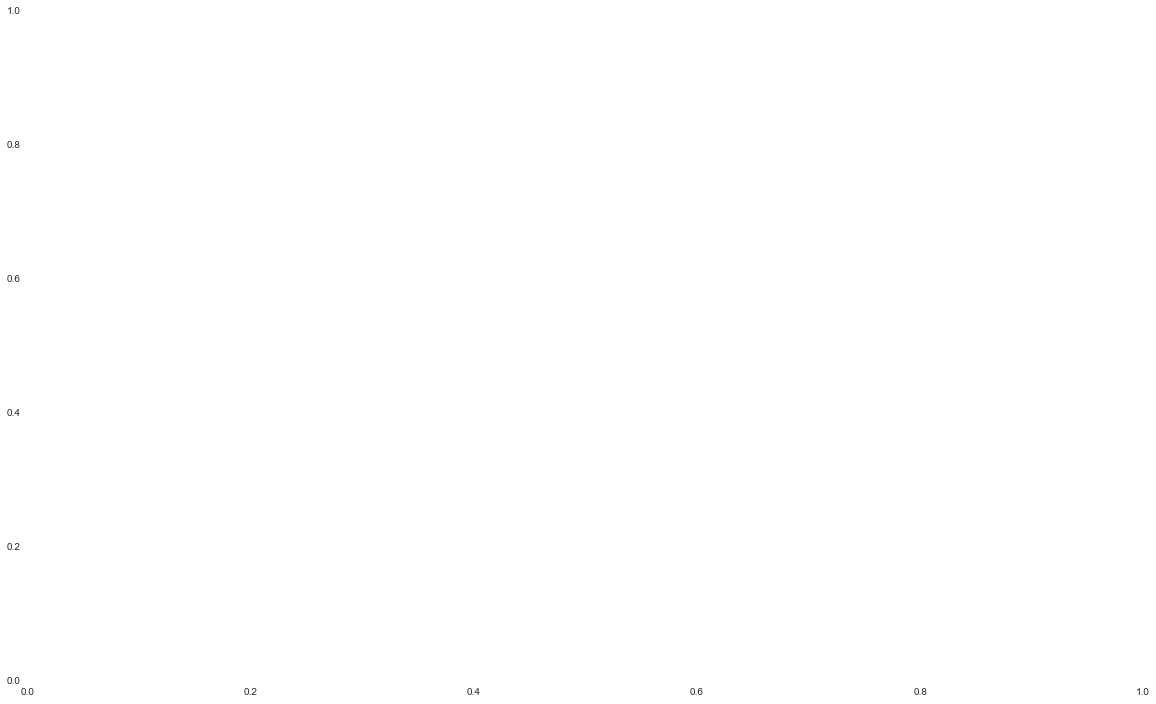

In [170]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)

###Exercise 2: Build a simple logistic regression and visualize it
use the variable "capital_run_length_longest" to predict "is_spam" How accurate is this single feature?

In [143]:
#your code here
features = pd.DataFrame(spam_data["capital_run_length_longest"].values)
target = spam_data["is_spam"].values

In [144]:
lr = LogisticRegression(C=1)
lr.fit(features, targets)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [145]:
target_predicted = lr.predict(features)
accuracy_score(targets, target_predicted)

0.72549445772658117

It appears to be a little over 70% accurate in predicting whether or not an email is spam, which is pretty good.

###Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [146]:
#your code here
features_array = spam_data.ix[:,:-1].values
target_array = spam_data["is_spam"].values

In [147]:
features_train, features_test, target_train, target_test = train_test_split(\
    features_array, target_array, test_size=0.30, random_state=12)

In [148]:
lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [150]:
target_predicted = lr.predict(features_test)
accuracy_score(target_test, target_predicted)

0.93193338160753081

Using all of the variables, the accuracy of the model is much improved (over 90%!)

###Exercise 4: Apply cross validation to see how the model fares across different splits of your data
Use cross validation to score your model

In [160]:
#your code here
lr = LogisticRegression(C=1)
scores = cross_val_score(lr, features_array, targets_array, cv=KFold(len(features_array), n_folds=5, shuffle=True, random_state=12), scoring='accuracy')
np.mean(scores)

0.93001439833829003

The model seems to be fairly consistent across different splits of data

###Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
Which model is more accurate?

In [182]:
#your code here
knn1 = neighbors.KNeighborsClassifier(3)
scores = cross_val_score(knn1, features_array, targets_array, cv=KFold(len(features_array), n_folds=5, shuffle=True, random_state=12), scoring='accuracy')
np.mean(scores)

0.80808690931407268

For this dataset, logistic regression model is much more accurate than KNN with 3 neighbors

###Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [200]:
#your code here
feature_names = spam_data.columns.values[:57]
#feature_names
feature_names

array(['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data',
       'word_freq_415', 'word_freq_85', 'word_freq_technology',
       'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq

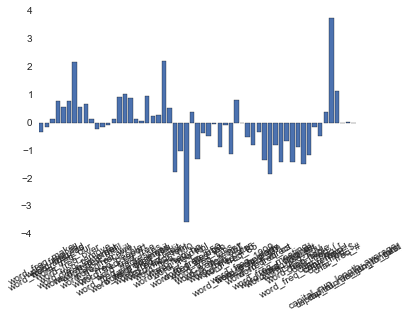

In [224]:
lr = LogisticRegression(C=1)
lr.fit(features_array, target_array)
x = np.arange(len(feature_names))
plt.bar(x, lr.coef_.ravel())
_ = plt.xticks(x + .5, feature_names, rotation=30)

In [246]:
coef_df = pd.DataFrame(data = lr.coef_, columns= feature_names)
coef_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.321615,-0.157772,0.142524,0.766422,0.55379,0.770029,2.181976,0.575145,0.680259,0.118496,-0.232075,-0.143191,-0.07472,0.145195,0.90705,1.026913,0.893255,0.125993,0.074621,0.960798,0.244482,0.27695,2.194509,0.514517,-1.7841,-1.016768,-3.575329,0.373622,-1.29373,-0.362509,-0.480074,-0.056877,-0.871723,-0.066732,-1.118125,0.814801,0.000833,-0.505166,-0.784315,-0.33234,-1.353569,-1.851591,-0.789205,-1.393291,-0.668031,-1.396323,-0.857986,-1.47734,-1.142843,-0.149152,-0.475148,0.377906,3.754555,1.128142,-0.012923,0.008217,0.000528


<pre>
Most influential features in the model were:
1. Those with a positive correlation to spam (greater than 1);
    remove
    free
    000
    $
    #
2. Those with a negative correlation to spam (less than 1):
    hp
    hpl
    lab
    85
    cs
    meeting
    project
    edu
    conference
    george
    ;
</pre>


###Exercise 7: Plot the ROC Curve for the logistic regression you chose¶

In [261]:
features_array = spam_data.ix[:,:-1].values
target_array = spam_data["is_spam"].values

features_train, features_test, target_train, target_test = train_test_split(\
    features_array, target_array, test_size=0.30, random_state=12)

lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)

#target_predicted = lr.predict(features_test)

target_predicted_proba = lr.predict_proba(features_test)

In [262]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

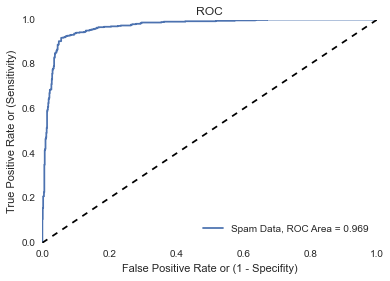

In [263]:
plot_roc_curve(target_test, target_predicted_proba, "Spam Data")

###Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [ ]:
#your code here


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea?

In [ ]:
#your essay-style answer here
